# Ocean ONE STEP eddy tracking SATELLITE

In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

In [2]:
# Import SSHa satellite.
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/dataset_aviso.nc')
ssha=squeeze(ncfile.variables['sla'][:])
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['longitude'][:]
lat=ncfile.variables['latitude'][:]

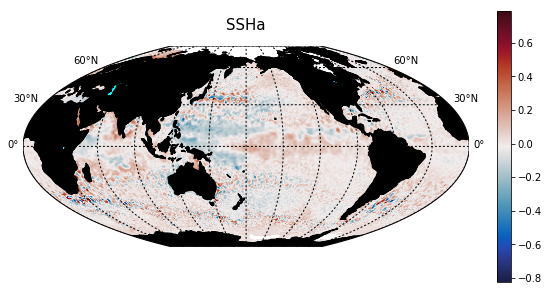

In [3]:
basemap_mplot(lon,lat,ssha[0,:,:],title="SSHa",projection='mbtfpq',lat_0=-90,lon_0=-180,\
              resolution='c',scale='Lin',vmin='',vmax='',cmap=cm.cm.balance,xan=1,yan=1,\
              figsize=(10,5),fontsize=15)
colorbar()

In [ ]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.
areamap=array([[0,len(lon)],[0,len(lat)]])

In [ ]:
eddytd=analyseddyzt(ssha[:,:,:],lon,lat,0,30,1,0.4,0.1,.1,data_meant='',areamap='',mask=''\
                     ,destdir='',physics='',diagnostics=False,plotdata=False,pprint=False)

 0% [========>]30% Time Elapsed: 1114 s   data is an anomalyBe sure the data is an anomalyBe sure the data is an anomalyBe sure the data is an anomalyBe sure the data is an anomalyBe sure the data is an anomalyBe sure the data is an anomalyBe sure the data is an anomalyBe sure the data is an anomaly

In [ ]:
threshold=1
eddysplot=exeddy(eddytd,lat,lon,ssha[0,:,:],0,threshold,diagnostics=False)

In [ ]:
eddytdn=analyseddyzt(ssha[:,:,:],lon,lat,0,30,1,-.40,-.1,-.1,data_meant='',areamap=areamap,mask=''\
                     ,destdir='',physics='',diagnostics=False,pprint=False)

In [ ]:
threshold=1
eddysplotn=exeddy(eddytdn,lat,lon,ssha[0,:,:],0,threshold,diagnostics=False)

In [ ]:
basemap_mplot(lon,lat,[ssha[0,:,:],ssha[0,:,:]-eddysplot-eddysplotn,eddysplotn,eddysplot]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction","Positive Eddies extraction"]\
              ,projection='mbtfpq',lat_0=-90,lon_0=-180,scale='Lin',cmap=cm.cm.balance,\
              vmin=-.40,vmax=.40,xan=2,yan=2,figsize=(20,10),fontsize=20);

In [ ]:
mask=ma.getmask(ssha[0,:,:])

In [ ]:
u_g,v_g=geovelfield(ssha[0,:,:],lon,lat,mask)
print(u_g.max(),v_g.max())

In [ ]:
threshold=3
eddysup=exeddy(eddytd,lat,lon,u_g,0,threshold,inside=ssha[0,:,:],diagnostics=False)
eddysun=exeddy(eddytdn,lat,lon,u_g,0,threshold,inside=ssha[0,:,:],diagnostics=False)

In [ ]:
threshold=3
eddysvp=exeddy(eddytd,lat,lon,v_g,0,threshold,inside=ssha[0,:,:],diagnostics=False)
eddysvn=exeddy(eddytdn,lat,lon,v_g,0,threshold,inside=ssha[0,:,:],diagnostics=False)

In [ ]:
eddyu=(eddysun+eddysup)
eddyv=(eddysvn+eddysvp)
print(eddyu.max(),eddyv.max())

In [ ]:
eke=KE(eddyu,eddyv)
bjke=KE(u_g-eddyu,v_g-eddyv)
ke=KE(u_g,v_g)
print(ke.max(),bjke.max(),eke.max())

In [ ]:
basemap_mplot(lon,lat,[ke,bjke,eke]\
              ,title=["KE","B&J KE","EKE"],scale='Lin',cmap=cm.cm.tempo,\
              projection='mbtfpq',lat_0=-90,lon_0=-180,vmin=0,vmax=0.2,xan=3,yan=1,figsize=(20,30),fontsize=20);

In [ ]:
basemap_mplot(lon,lat,ke\
              ,title="KE",scale='Lin',cmap=cm.cm.tempo,\
              projection='mbtfpq',lat_0=-90,lon_0=-180,vmin=0,vmax=0.2,xan=1,yan=1,figsize=(20,10),fontsize=20);
colorbar()

In [ ]:
u_g=zeros(shape(ssha))
v_g=zeros(shape(ssha))
for ii in range(30):
    u_g[ii,:,:],v_g[ii,:,:]=geovelfield(ssha[ii,:,:],lon,lat,mask)

In [ ]:
threshold=3
eddysup=exeddydt(eddytd,lat,lon,u_g,threshold,inside=ssha[:,:,:],diagnostics=False)
eddysun=exeddydt(eddytdn,lat,lon,u_g,threshold,inside=ssha[:,:,:],diagnostics=False)

In [ ]:
threshold=3
eddysvp=exeddydt(eddytd,lat,lon,v_g,threshold,inside=ssha[:,:,:],diagnostics=False)
eddysvn=exeddydt(eddytdn,lat,lon,v_g,threshold,inside=ssha[:,:,:],diagnostics=False)

In [ ]:
eddyu=(eddysun+eddysup)
eddyv=(eddysvn+eddysvp)

In [ ]:
###Creating animation of KE
eke =zeros(shape(eddyu))
print(shape(eke))
for ii in range(30):
    eke[ii,:,:]=KE(eddyu[ii,:,:],eddyv[ii,:,:])
    bjke=KE(u_g[ii,:,:]-eddyu[ii,:,:],v_g[ii,:,:]-eddyv[ii,:,:])
    ke=KE(u_g[ii,:,:],v_g[ii,:,:])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='html5')
############################
#Create the figure

fig = plt.figure(figsize=(15, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)
#############################
#Plot the background and other things, This will be in all the frames
map = Basemap(projection='mbtfpq',lat_0=-90,lon_0=-180,resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='aqua')
map.drawcoastlines()
map.drawcoastlines()
quad1 = ax1.pcolormesh(lonm,latm,eke[0,:,:],shading='gouraud',cmap=cm.cm.tempo,\
              vmin=0,vmax=0.2)
cb1 = fig.colorbar(quad1,ax=ax1)
##############################

##############################
#Intitial stage blank
def init():
    quad1.set_array([])
    return quad1
##############################

##############################
#Animation function, replace the values of the eke in a '1d list'
def animate(iter):
    quad1.set_array(eke[iter,:,:].ravel())
    return quad1
##############################

##############################
#Remove edges
gs.tight_layout(fig)
##############################

##############################
#Animation structure
anim2 = animation.FuncAnimation(fig,animate,frames=30,interval=1000,blit=False,repeat=False)
##############################
plt.close()
##############################
#Display and convert animation to html5
anim2



In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

In [ ]:
##############################
#Save animation
anim2.save('eke_30days_1axis.mp4', writer=writer)